In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('dark_background')


In [2]:
model1 = RandomForestClassifier()
model2 = GaussianNB()


In [3]:
ds = pd.read_csv(r"C:\Users\DELL\Downloads\archive\3.Time_domain_subsamples\KU-HAR_time_domain_subsamples_20750x300.csv")
print(ds.head(6))
print(ds.isna().sum())
ds = ds.values
ds.shape

   -1.1794  -2.2475  -3.2887  -4.3472  -5.9113  -6.2584  -6.5078   -6.4628  \
0 -4.20060  -3.7872  -3.2088 -2.43140  -1.6381 -0.95911 -0.34243  0.098052   
1  2.57980   2.2353   1.9758  1.87970   2.3617  2.97330  3.76380  4.440300   
2 -4.30720  -3.2173  -1.6004  0.14365   1.5420  2.83550  3.82610  5.013800   
3  2.03590   2.2449   2.6152  3.18060   3.4588  3.67870  3.96670  4.332600   
4 -0.54698  -1.6422  -2.7907 -2.98720  -2.1748 -0.58411  2.57490  3.283500   
5  4.78180   4.1231   3.5200  2.53360   1.6734  0.85553  0.30331  0.673290   

    -5.992  -5.2045  ...  -0.71329  -0.64166  -0.58875  -0.56362  -0.55943  \
0  0.31165  0.26321  ...  0.593270  0.579220  0.498590   0.33488  0.158950   
1  4.91460  5.05290  ... -0.412820 -0.607690 -0.735970  -0.79172 -0.616240   
2  4.93240  3.94910  ... -0.478800 -0.463070 -0.393890  -0.28454 -0.099449   
3  4.45510  3.50220  ...  0.064874  0.060598  0.086254   0.11741  0.070372   
4  3.39010  2.93440  ...  0.349540  0.357480  0.383130   0.3984

(13830, 1803)

In [4]:
signals = ds[ :,0:1800]
labels = ds[ :,1800]
print(signals.shape)
print(labels.shape)

(13830, 1800)
(13830,)


In [4]:
ds[12457,1800]

7.0

In [5]:
ds[4800,1800]

3.0

# Visulizations



In [13]:
time = np.linspace(0.1,3,300)
Accelerometer_X_axis_data = signals[12457, 0: 300]
Accelerometer_Y_axis_data = signals[12457, 300: 600]
Accelerometer_Z_axis_data = signals[12457, 600: 900]
Gyroscope_X_axis_data = signals[12457, 900: 1200]
Gyroscope_Y_axis_data = signals[12457, 1200: 1500]
Gyroscope_Z_axis_data = signals[12457, 1500: 1800]

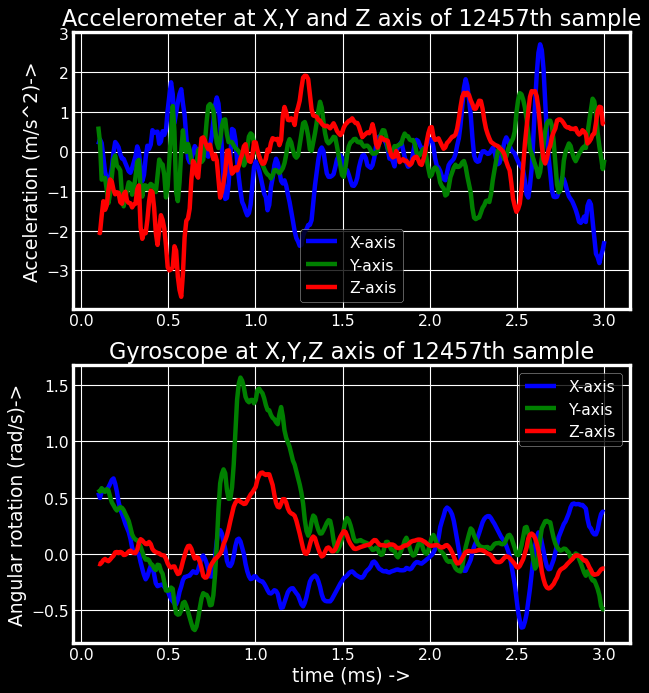

In [16]:
figure(figsize=(8, 30), dpi=80)
ax1 = plt.subplot(611)
ax1.plot(time, Accelerometer_X_axis_data, 'b',label='X_axis')
ax1.plot(time, Accelerometer_Y_axis_data, 'g',label = 'Y_axis')
ax1.plot(time, Accelerometer_Z_axis_data, 'r',label = 'Z_axis')
ax1.title.set_text('Accelerometer at X,Y and Z axis of 12457th sample')
ax1.set_ylabel('Acceleration (m/s^2)->')
plt.legend(labels= ['X-axis','Y-axis','Z-axis'])

ax2 = plt.subplot(612)
ax2.plot(time, Gyroscope_X_axis_data, 'b')
ax2.plot(time, Gyroscope_Y_axis_data, 'g')
ax2.plot(time, Gyroscope_Z_axis_data, 'r')
ax2.title.set_text('Gyroscope at X,Y,Z axis of 12457th sample')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Angular rotation (rad/s)->')
plt.legend(labels= ['X-axis','Y-axis','Z-axis'])

In [21]:
Accelerometer_X_axis_data = signals[4800, 0: 300]
Accelerometer_Y_axis_data = signals[4800, 300: 600]
Accelerometer_Z_axis_data = signals[4800, 600: 900]
Gyroscope_X_axis_data = signals[4800, 900: 1200]
Gyroscope_Y_axis_data = signals[4800, 1200: 1500]
Gyroscope_Z_axis_data = signals[4800, 1500: 1800]

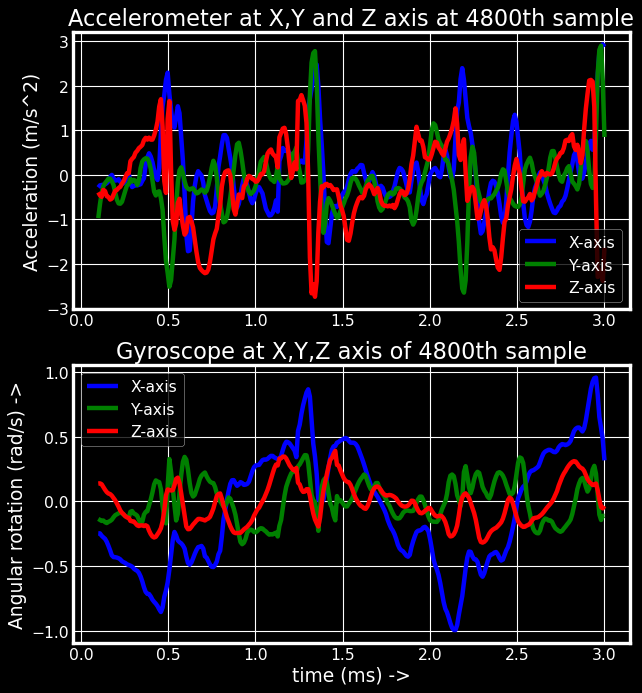

In [23]:
figure(figsize=(8, 30), dpi=80)
ax1 = plt.subplot(611)
ax1.plot(time, Accelerometer_X_axis_data, 'b',label='X_axis')
ax1.plot(time, Accelerometer_Y_axis_data, 'g',label = 'Y_axis')
ax1.plot(time, Accelerometer_Z_axis_data, 'r',label = 'Z_axis')
ax1.title.set_text('Accelerometer at X,Y and Z axis at 4800th sample')
ax1.set_ylabel('Acceleration (m/s^2)')
plt.legend(labels= ['X-axis','Y-axis','Z-axis'])

ax2 = plt.subplot(612)
ax2.plot(time, Gyroscope_X_axis_data, 'b')
ax2.plot(time, Gyroscope_Y_axis_data, 'g')
ax2.plot(time, Gyroscope_Z_axis_data, 'r')
ax2.title.set_text('Gyroscope at X,Y,Z axis of 4800th sample')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Angular rotation (rad/s) ->')

plt.legend(labels= ['X-axis','Y-axis','Z-axis'])


In [6]:
X_train, X_test, y_train, y_test=train_test_split(signals,labels, test_size=0.25)
print(X_train.shape)
print(X_test.shape)


(10372, 1800)
(3458, 1800)


In [7]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

In [8]:
print(model1.fit(X_train,y_train))
print(model2.fit(X_train,y_train))


RandomForestClassifier()
GaussianNB()


In [9]:
print(model1.score(X_test,y_test))
print(model2.score(X_test,y_test))


0.8614806246385194
0.7929438982070561


In [10]:
y_pred = model1.predict(X_test)
y_pred1 = model2.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         2.0       0.91      0.93      0.92       434
         3.0       0.83      0.98      0.90       461
         4.0       0.87      0.99      0.92       582
         5.0       0.97      0.94      0.96       445
         6.0       0.86      0.96      0.90       425
         7.0       0.75      0.82      0.78       342
         8.0       0.94      0.92      0.93       180
         9.0       0.98      0.36      0.52       126
        15.0       0.76      0.50      0.60       175
        16.0       0.73      0.64      0.68       186
        17.0       0.96      0.25      0.40       102

    accuracy                           0.86      3458
   macro avg       0.87      0.75      0.78      3458
weighted avg       0.87      0.86      0.85      3458

              precision    recall  f1-score   support

         2.0       0.95      0.64      0.76       434
         3.0       0.92      0.90      0.91       461
         4.0       0.90 